In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set(rc={"figure.figsize": (20, 10)})

# Carregando os dados

In [2]:
covid_df = pd.read_excel("../dados/processados/casos_obitos_por_estado.xlsx")
covid_df.columns = ["uf", "casos", "obitos"]
covid_df.set_index("uf", inplace=True)

In [3]:
censo_df = pd.read_excel("../dados/processados/brasil_demografia_censo2010.xlsx")
censo_df.columns = ["uf", "rural", "urbana", "total"]
censo_df.set_index("uf", inplace=True)

In [4]:
economia_df = pd.read_excel("../dados/processados/economia_atlas2013.xlsx")
economia_df.set_index("UFN", inplace=True)

In [5]:
idade_df = pd.read_excel("../dados/processados/espectativa_de_vida_atlas2013.xlsx")
idade_df.set_index("UFN", inplace=True)

In [6]:
saude_df = pd.read_csv("../dados/brutos/lista_insumos_e_leitos_9julho.csv", sep=";")
saude_df.set_index("uf", inplace=True)
print(saude_df.columns)
# Filtrando port colunas de interesse
saude_df = saude_df[["Vacinas aplicadas - influenza ", "Cloroquina - comprimidos", "Respiradores distribuidos", "Leitos UTI habilitados", "Teste PCR", "Teste rápido"]]
saude_df.columns = ["vacinasAplicadas", "cloroquina", "respiradores", "leitosUTI", "testePCR", "testeR"]


Index(['Vacinas distribuidas - influenza', 'Vacinas aplicadas - influenza ',
       'Mascara cirúrgica', 'Mascara N95', 'Alcool em gel - L', 'Avental',
       'Teste rápido', 'Luvas', 'Óculos e protetor facial',
       'Touca e sapatilha', 'Cloroquina - comprimidos',
       'Oseltamivir - cápsulas', 'Teste PCR', 'Leitos locados',
       'Leitos UTI adulto', 'Respiradores distribuidos', 'UTI adulto SUS',
       'Uti adulto não SUS', 'Leitos UTI habilitados', 'Mais Médicos'],
      dtype='object')


In [7]:
# Renomenando siglas para nome do estado
with open("../dados/siglas_estados.json", "r") as f:
    estado2sigla = json.load(f)
sigla2estado = {sigla: estado for estado, sigla in estado2sigla.items()}
saude_df.rename(sigla2estado, inplace=True)

# Combinando tabelas

In [8]:
data_df = covid_df.join(censo_df)
data_df = data_df.join(economia_df)
data_df = data_df.join(idade_df)
data_df = data_df.join(saude_df)

In [9]:
data_df

,casos,obitos,rural,urbana,total,pctPobreza,vulnProbreza,rendaPerCapta,PEA,concRiqueza,A15,A18,A25,A65,vacinasAplicadas,cloroquina,respiradores,leitosUTI,testePCR,testeR
uf,,,,,,,,,,,,,,,,,,,,
São Paulo,341365,16788,1676948,39585251,41262199,4.66,16.13,1084.46,21723910,46.87,32310780,30323379,25391883,3228313,15312908.0,986000.0,766.0,2074.0,742460.0,1660420
Rio de Janeiro,126329,10970,525690,15464239,15989929,7.23,22.26,1039.30,7852543,49.33,12586696,11814446,10017473,1425430,5085180.0,224000.0,814.0,762.0,517736.0,620560
Bahia,95536,2277,3914430,10102476,14016906,28.72,52.71,496.73,6581418,51.05,10417051,9597387,7787985,1013309,3976590.0,41000.0,321.0,539.0,137392.0,509020
Espírito Santo,58537,1911,583480,2931472,3514952,9.53,26.82,815.43,1832872,45.87,2693846,2511810,2071379,248796,1321547.0,78000.0,155.0,165.0,90488.0,135760
Distrito Federal,64314,801,87950,2482210,2570160,4.93,16.00,1715.11,1408410,49.26,1961144,1829600,1494808,127625,970658.0,72000.0,230.0,185.0,113548.0,151740
Alagoas,42322,1213,822634,2297860,3120494,34.29,59.76,432.56,1261201,51.76,2207366,2012326,1605052,187531,972916.0,412000.0,185.0,154.0,84004.0,107420
Minas Gerais,64035,1355,2882114,16715216,19597330,10.97,28.85,749.69,9973375,45.98,15174142,14134428,11727697,1591549,7415148.0,85000.0,409.0,413.0,665640.0,783960
Rio Grande do Sul,35557,825,1593638,9100291,10693929,6.37,18.65,959.24,5831829,43.90,8419828,7890893,6682390,989885,4296420.0,49000.0,297.0,624.0,129344.0,493680
Goiás,33367,748,583074,5420714,6003788,7.59,24.22,810.97,3168725,45.75,4557415,4235351,3470629,375237,2057100.0,29000.0,276.0,200.0,87088.0,225700


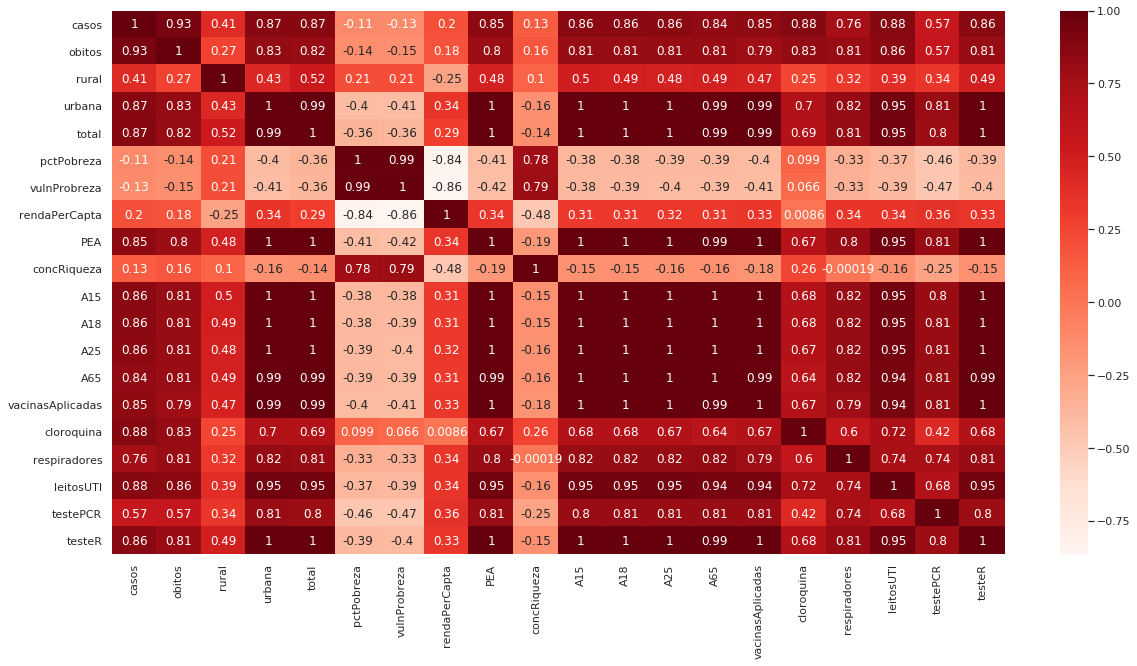

In [10]:
correlation = data_df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)

# Combinando resultados um único DataFrame

In [11]:
correlation_df = pd.DataFrame(index=data_df.columns, columns=["casosCor", "obitosCor"])
correlation_df["casosCor"] = correlation["casos"][correlation_df.index]
correlation_df["obitosCor"] = correlation["obitos"][correlation_df.index]

# Analisando casos

In [12]:
correlation_df.sort_values("casosCor", ascending=False, inplace=True)
correlation_df[["casosCor"]]

,casosCor
casos,1.000000
obitos,0.932477
cloroquina,0.881627
leitosUTI,0.877129
urbana,0.869591
total,0.869051
testeR,0.864471
A15,0.863082
A18,0.862219
A25,0.858600


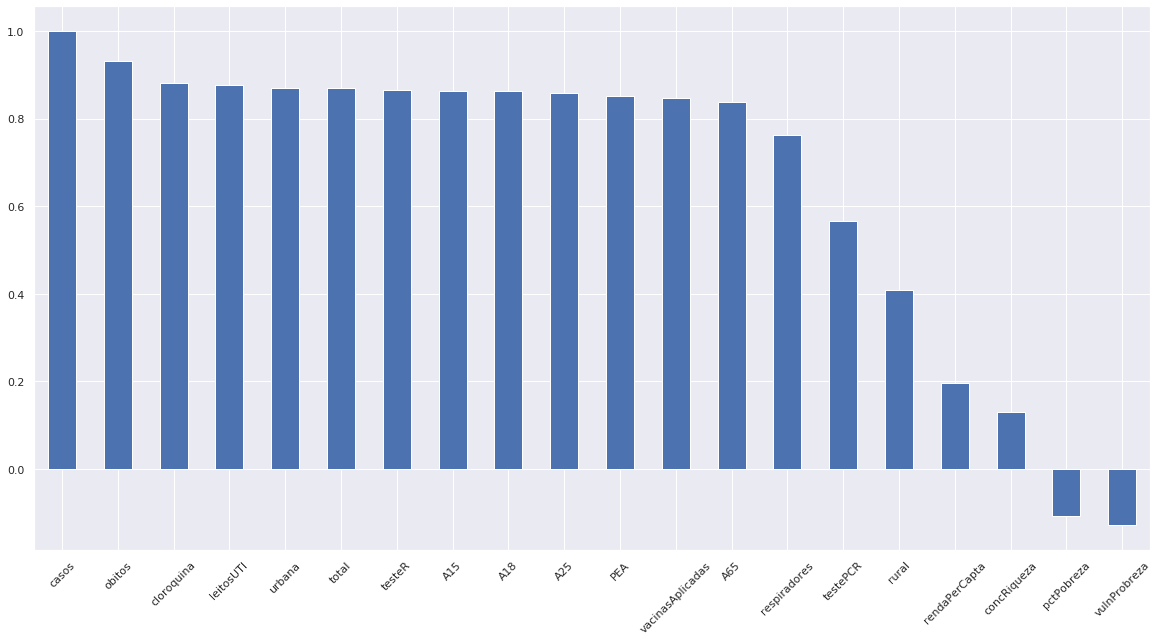

In [13]:
correlation_df["casosCor"].plot.bar(rot=45)

# Analisando óbitos

In [14]:
correlation_df.sort_values("obitosCor", ascending=False, inplace=True)
correlation_df[["obitosCor"]]

,obitosCor
obitos,1.000000
casos,0.932477
leitosUTI,0.857402
urbana,0.831279
cloroquina,0.826312
total,0.816759
A18,0.814533
A15,0.814429
A25,0.813911
respiradores,0.809636


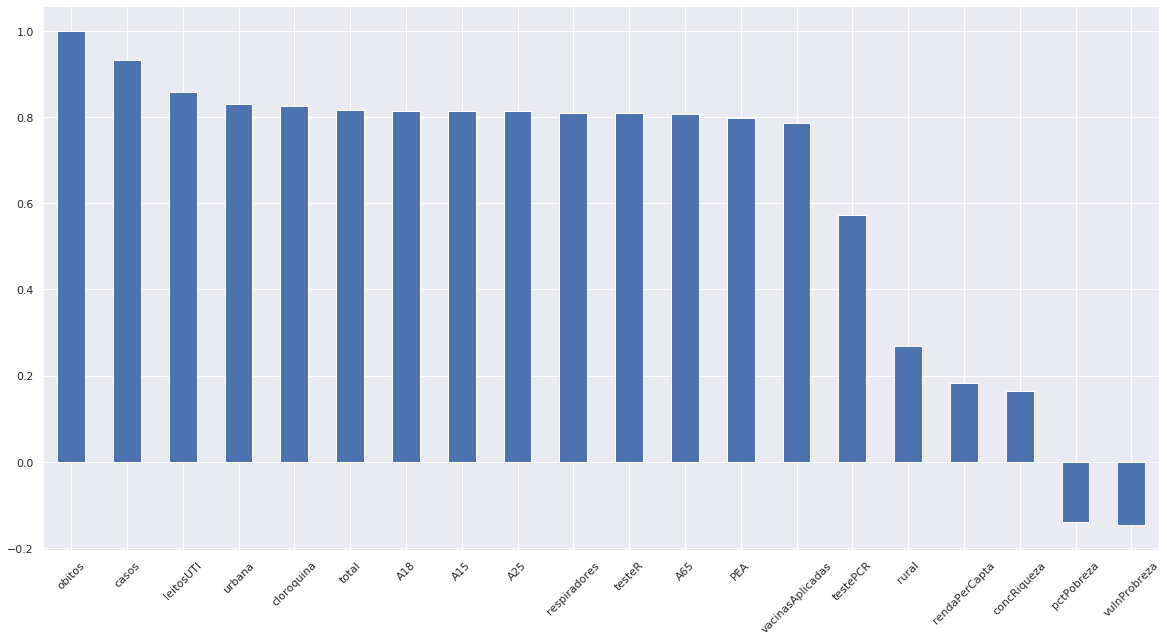

In [15]:
correlation_df["obitosCor"].plot.bar(rot=45)

# Buscando por regiões de risco

In [16]:
TOPP = 15
TOPK = 7

In [17]:
data_df[["casos", "obitos"]].sort_values(by="casos", ascending=False).head(10)

,casos,obitos
uf,,
São Paulo,341365,16788
Ceará,129598,6665
Rio de Janeiro,126329,10970
Pará,120731,5196
Bahia,95536,2277
Maranhão,92939,2324
Amazonas,80082,2967
Pernambuco,67604,5323
Distrito Federal,64314,801


In [18]:
pop_urbana_df = data_df.sort_values(by=["urbana"], ascending=False).head(TOPP)
mais_populosos = pop_urbana_df.index.to_list()

In [19]:
mais_populosos

['São Paulo',
 'Minas Gerais',
 'Rio de Janeiro',
 'Bahia',
 'Rio Grande do Sul',
 'Paraná',
 'Pernambuco',
 'Ceará',
 'Goiás',
 'Santa Catarina',
 'Pará',
 'Maranhão',
 'Espírito Santo',
 'Paraíba',
 'Amazonas']

In [20]:
com_menos_leitos = pop_urbana_df.sort_values(by="leitosUTI").head(TOPK).index.to_list()
pop_urbana_df[["casos", "obitos", "leitosUTI"]].sort_values(by="leitosUTI")

,casos,obitos,leitosUTI
uf,,,
Espírito Santo,58537,1911,165.0
Paraíba,56349,1171,170.0
Amazonas,80082,2967,194.0
Goiás,33367,748,200.0
Maranhão,92939,2324,238.0
Pará,120731,5196,336.0
Ceará,129598,6665,402.0
Minas Gerais,64035,1355,413.0
Paraná,35715,895,473.0


In [21]:
com_menos_leitos

['Espírito Santo', 'Paraíba', 'Amazonas', 'Goiás', 'Maranhão', 'Pará', 'Ceará']

In [22]:
com_menos_testes = pop_urbana_df.sort_values(by="testePCR").head(TOPK).index.to_list()
pop_urbana_df[["casos", "obitos", "testePCR"]].sort_values(by="testePCR")

,casos,obitos,testePCR
uf,,,
Paraíba,56349,1171,84748.0
Maranhão,92939,2324,86212.0
Goiás,33367,748,87088.0
Espírito Santo,58537,1911,90488.0
Amazonas,80082,2967,100896.0
Ceará,129598,6665,118032.0
Pernambuco,67604,5323,118720.0
Santa Catarina,36810,432,120720.0
Rio Grande do Sul,35557,825,129344.0


In [23]:
com_menos_testes

['Paraíba',
 'Maranhão',
 'Goiás',
 'Espírito Santo',
 'Amazonas',
 'Ceará',
 'Pernambuco']

In [24]:
com_menos_respiradores = pop_urbana_df.sort_values(by="respiradores").head(TOPK).index.to_list()
pop_urbana_df[["casos", "obitos", "respiradores"]].sort_values(by="respiradores")

,casos,obitos,respiradores
uf,,,
Santa Catarina,36810,432,73.0
Pernambuco,67604,5323,135.0
Espírito Santo,58537,1911,155.0
Ceará,129598,6665,180.0
Amazonas,80082,2967,222.0
Maranhão,92939,2324,241.0
Paraíba,56349,1171,245.0
Goiás,33367,748,276.0
Rio Grande do Sul,35557,825,297.0


In [25]:
com_menos_respiradores

['Santa Catarina',
 'Pernambuco',
 'Espírito Santo',
 'Ceará',
 'Amazonas',
 'Maranhão',
 'Paraíba']

# Determinando estados com menos insumos no geral (Supondo que a deficiência de insumos seja prejudicial)

In [26]:
com_menos_leitos = set(com_menos_leitos)
com_menos_respiradores = set(com_menos_respiradores)
com_menos_testes = set(com_menos_testes)

In [27]:
risco = com_menos_leitos & com_menos_respiradores & com_menos_testes

In [28]:
risco

{'Amazonas', 'Ceará', 'Espírito Santo', 'Maranhão', 'Paraíba'}